In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = Graph.Read_Ncol("moreno_innovation", directed = False)
with open('redes e centralidades/centralidades-moreno_innovation-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [3]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.14166666666666666, 0.125, 0.10833333333333334, 0.09166666666666666, 0.0875, 0.08333333333333333, 0.08333333333333333, 0.07916666666666666, 0.07916666666666666, 0.07916666666666666] 

[0.015428116257902795, 0.014893273699691864, 0.013446400865046502, 0.01317090555284316, 0.012641405696064147, 0.01224842643854434, 0.011553744916256173, 0.01115844708010288, 0.011033386857012209, 0.010968406471336475] 

[0.022346151558683046, 0.020422286891691843, 0.019295878270764122, 0.018037591720783612, 0.017331885990358262, 0.016604678868986544, 0.016564138664586888, 0.016328232519028943, 0.01427468893396103, 0.012985829002073793] 

[0.21201851851851852, 0.20128340365682137, 0.19631344307270235, 0.19081666666666666, 0.1841859716859717, 0.18277458492975737, 0.18001572327044027, 0.17933897243107771, 0.17668209876543212, 0.176030135301353] 

[0.43589637636200435, 0.3879723945867163, 0.3337180214582526, 0.33357797629507274, 0.3292605894533414, 0.2488885415570631, 0.24069688126937164, 0.2020136032691186

In [4]:
len(centralidade_list)

7

In [5]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(241, 7)

In [6]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9958147453
(array([0.99995815]), 1)
(array([220.58219082]), 1)


In [7]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

241

In [8]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality']

In [9]:
#  A partir daqui analise de correlacao entre as medidas

In [10]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [11]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

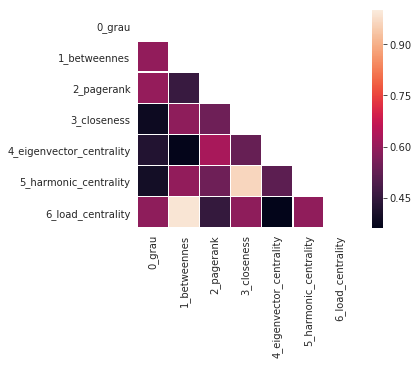

In [12]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

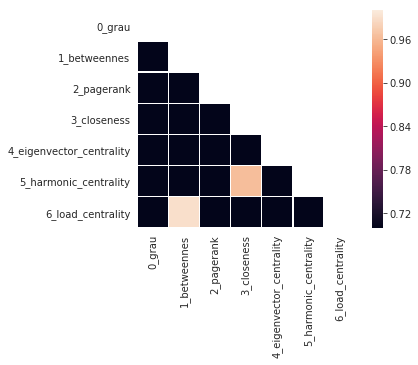

In [13]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

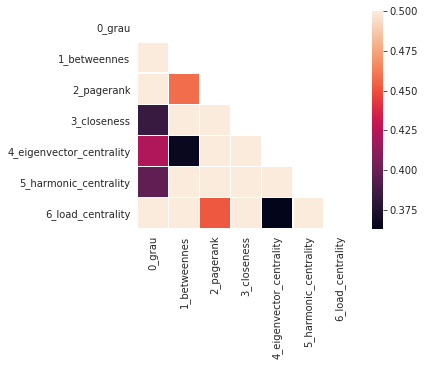

In [16]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .5,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [17]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(241, 8)

In [18]:
matrix_teste = X

In [19]:
# Alta correlacao moreno_innovation

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_5 = calcula_PCA(matrix_teste,3,5)

99.999396998
99.9996565738


In [20]:
# Baixa correlacao moreno_innovation
c_0_3 = calcula_PCA(matrix_teste,0,3)
c_0_4 = calcula_PCA(matrix_teste,0,4)
c_0_5 = calcula_PCA(matrix_teste,0,5)

c_1_2 = calcula_PCA(matrix_teste,1,4)
c_1_4 = calcula_PCA(matrix_teste,1,4)

c_6_2 = calcula_PCA(matrix_teste,6,4)
c_6_4 = calcula_PCA(matrix_teste,6,4)



88.2914359619
84.9433717583
99.9994775632
88.8968774871
88.8968774871
88.899751205
88.899751205


In [21]:
#  adicionando na matrix temporaria moreno_innovation
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_4[1]]).transpose()))
matrix_teste.shape



(241, 17)

In [62]:
# olhando correlacao das novas medidas da matrix teste

In [22]:
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','35','03','04','05','12','14','62','64']



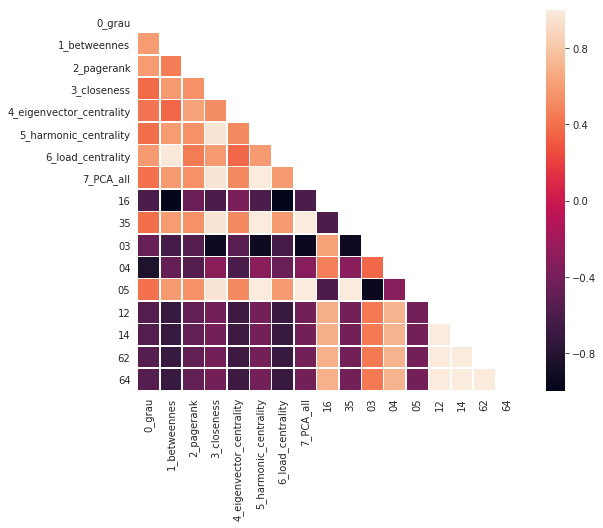

In [23]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [24]:
import pandas as pd


In [25]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [29]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_16':c_1_6[0][:100],
     'm_35':c_3_5[0][:100],
     'm_03':c_0_3[0][:100],
     'm_04':c_0_4[0][:100],
     'm_05':c_0_5[0][:100],
     'm_12':c_1_2[0][:100],
     'm_14':c_1_4[0][:100],
     'm_62':c_6_2[0][:100],
     'm_64':c_6_4[0][:100]
    }

In [30]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_03,m_04,m_05,m_12,m_14,m_16,m_35,m_62,m_64
0,126,73,14,14,207,14,73,14,5,5,14,5,5,5,14,5,5
1,14,39,73,11,208,11,39,11,238,211,11,238,238,240,11,238,238
2,120,28,126,73,219,73,28,73,205,238,73,229,229,238,73,229,229
3,73,34,11,39,220,39,34,39,113,205,39,213,213,237,39,213,213
4,39,14,39,15,209,15,11,22,204,113,22,211,211,236,15,211,211


In [31]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_3_5[0][:50],
    c_0_3[0][:50],
    c_0_4[0][:50],
    c_0_5[0][:50],
    c_1_2[0][:50], 
    c_1_4[0][:50],
    c_6_2[0][:50], 
    c_6_4[0][:50]]
with open('sementes-moreno_innovation.txt', 'wb') as f:
    pickle.dump(s, f)